# Objetivo

Esta análise exploratória de dados (exploratory data analysis - EDA) tem o objetivo principal de analisar casos de uso para os dados da Olist com foco em modelos de machine learning. 

Para isso, precisamos primeiro entender o comportamento dos dados e como estão relacionados entre si.

Fonte das tabelas usadas neste notebook: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce.

# Bibliotecas

In [ ]:
import os
import shutil
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Carregando as tabelas

In [2]:
new_path = "../data/raw/"

# Se a pasta já existe e tem arquivos, apenas avisa
if os.path.exists(new_path) and len(os.listdir(new_path)) == 9:
    print(f"Já existem arquivos em '{new_path}'. Nenhum download necessário.")
else:
    # Remove a pasta de destino se já existir e tiver menos de 9 arquivos
    shutil.rmtree(new_path)
    # Faz o download do dataset
    path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
    print("Download concluído. Path:", path)
    # Move os arquivos baixados para a pasta de destino
    shutil.move(path, new_path)
    print(f"Arquivos movidos para '{new_path}'.")

Já existem arquivos em '../data/raw/'. Nenhum download necessário.


# Lendo as tabelas

In [ ]:
# Vendedores
sellers = pd.read_csv(f"{new_path}olist_sellers_dataset.csv")

# Consumidores
customers = pd.read_csv(f"{new_path}olist_customers_dataset.csv")

# Geolocalização
geolocation = pd.read_csv(f"{new_path}olist_geolocation_dataset.csv")

# Produtos
products = pd.read_csv(f"{new_path}olist_products_dataset.csv")

# Categoria dos produtos
product_category_name_translation = pd.read_csv(f"{new_path}product_category_name_translation.csv")

# Produtos pedidos
order_items = pd.read_csv(f"{new_path}olist_order_items_dataset.csv")

# Pagamentos dos pedidos
order_payments = pd.read_csv(f"{new_path}olist_order_payments_dataset.csv")

# Status dos pedidos
orders = pd.read_csv(f"{new_path}olist_orders_dataset.csv")

# Reviews dos pedidos
order_reviews = pd.read_csv(f"{new_path}olist_order_reviews_dataset.csv")

# Verificando os tipos das colunas e tamanho das tabelas

## Vendedores

In [29]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [33]:
sellers.info()
print(sellers.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
(3095, 4)


In [71]:
print(sellers["seller_id"].nunique())

3095


In [104]:
# Percentual de vendedores por estado
seller_state_count = sellers["seller_state"].value_counts().reset_index()
seller_state_pct = round(sellers["seller_state"].value_counts(normalize=True) * 100,1).reset_index()
seller_state = seller_state_count.merge(seller_state_pct, on="seller_state", how="left").sort_values(by="count", ascending=False)
seller_state

,seller_state,count,proportion
0,SP,1849,59.7
1,PR,349,11.3
2,MG,244,7.9
3,SC,190,6.1
4,RJ,171,5.5
5,RS,129,4.2
6,GO,40,1.3
7,DF,30,1.0
8,ES,23,0.7
9,BA,19,0.6


<Axes: title={'center': 'Distribuição de vendedores por estado'}, ylabel='% de vendedores'>

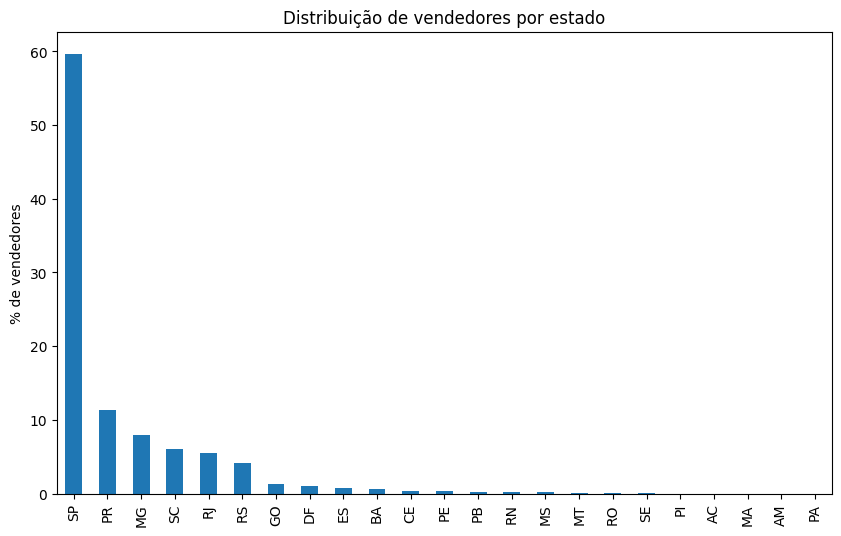

In [105]:
# Gráfico de barras dos vendedores por estado
seller_state.plot(
    x='seller_state',
    y='proportion',
    kind='bar',
    figsize=(10,6),
    xlabel='',
    ylabel='% de vendedores',
    title='Distribuição de vendedores por estado',
    legend=False
)

## Consumidores

In [67]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [68]:
customers.info()
print(customers.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
(99441, 5)


In [74]:
print(f"# de chave primária: {customers['customer_id'].nunique()}")
print(f"# de consumidores únicos: {customers['customer_unique_id'].nunique()}")

# de chave primária: 99441
# de consumidores únicos: 96096


In [149]:
# Percentual de consumidores por estado
customer_state = (
    customers
    .groupby(["customer_state"])
    .agg(
        count = ("customer_unique_id", "nunique")
    )
    .reset_index()
)
customer_state["proportion"] = round(customer_state["count"] / customer_state["count"].sum() * 100, 1)
customer_state = customer_state.sort_values(by="count", ascending=False)
customer_state

,customer_state,count,proportion
25,SP,40302,41.9
18,RJ,12384,12.9
10,MG,11259,11.7
22,RS,5277,5.5
17,PR,4882,5.1
23,SC,3534,3.7
4,BA,3277,3.4
6,DF,2075,2.2
7,ES,1964,2.0
8,GO,1952,2.0


<Axes: title={'center': 'Distribuição de consumidores por estado'}, ylabel='% de consumidores'>

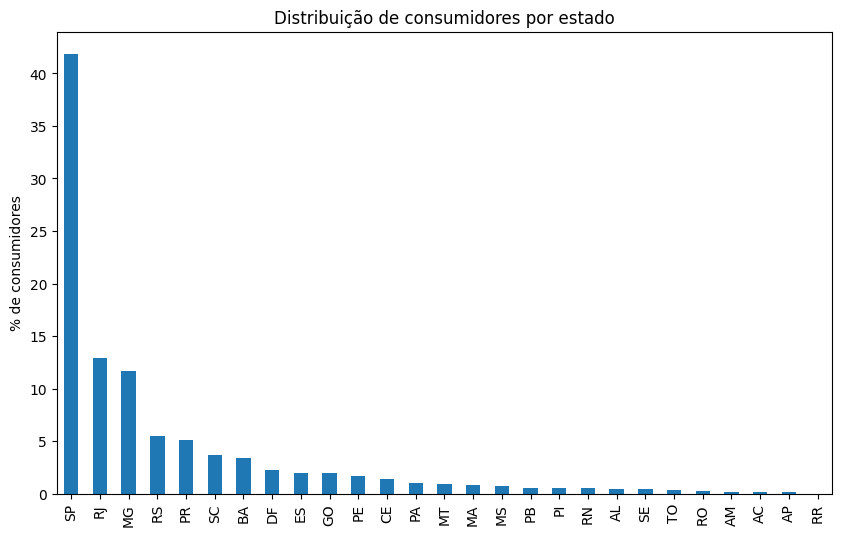

In [150]:
# Gráfico de barras dos vendedores por estado
customer_state.plot(
    x='customer_state',
    y='proportion',
    kind='bar',
    figsize=(10,6),
    xlabel='',
    ylabel='% de consumidores',
    title='Distribuição de consumidores por estado',
    legend=False
)

## Geolocalização

In [88]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [89]:
geolocation.info()
print(geolocation.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
(1000163, 5)


In [92]:
# Entendendo o código de geolocalização de Caucaia-CE
# A coluna "geolocation_zip_code_prefix" parece corresponder aos 5 primeiros dígitos do CEP (código postal)
geolocation_caucaia = geolocation[geolocation["geolocation_city"].str.lower() == "caucaia"]
geolocation_caucaia.sort_values(by="geolocation_zip_code_prefix")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
745115,61600,-3.729438,-38.664096,caucaia,CE
745011,61600,-3.721604,-38.662799,caucaia,CE
744916,61600,-3.727868,-38.665722,caucaia,CE
744988,61600,-3.728697,-38.663535,caucaia,CE
744892,61600,-3.732408,-38.663324,caucaia,CE
...,...,...,...,...,...
744967,61659,-3.780513,-38.652065,caucaia,CE
744961,61659,-3.735534,-38.617298,caucaia,CE
745010,61659,-3.768121,-38.645883,caucaia,CE
744993,61661,-3.781018,-38.630875,caucaia,CE


## Produtos

In [34]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
products.info()
print(products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
(32951, 9)


In [97]:
# As chaves primárias dos produtos parecem ser construídas a partir de um agrupamento das demais características do produto
print(f"# chave primária: {products['product_id'].nunique()}")
print(f"# categorias: {products['product_category_name'].nunique()}")

# chave primária: 32951
# categorias: 73


In [147]:
# Percentual de produtos por categoria
product_category = (
    products
    .groupby(["product_category_name"])
    .agg(
        count = ("product_id", "nunique")
    )
    .reset_index()
)
product_category["proportion"] = round(product_category["count"] / product_category["count"].sum() * 100, 1)
product_category = product_category.sort_values(by="count", ascending=False)
product_category

,product_category_name,count,proportion
13,cama_mesa_banho,3029,9.4
32,esporte_lazer,2867,8.9
54,moveis_decoracao,2657,8.2
11,beleza_saude,2444,7.6
72,utilidades_domesticas,2335,7.2
...,...,...,...
15,casa_conforto_2,5,0.0
37,fashion_roupa_infanto_juvenil,5,0.0
60,pc_gamer,3,0.0
67,seguros_e_servicos,2,0.0


<Axes: title={'center': 'Distribuição de produtos por categoria (top 10)'}, ylabel='% de produtos'>

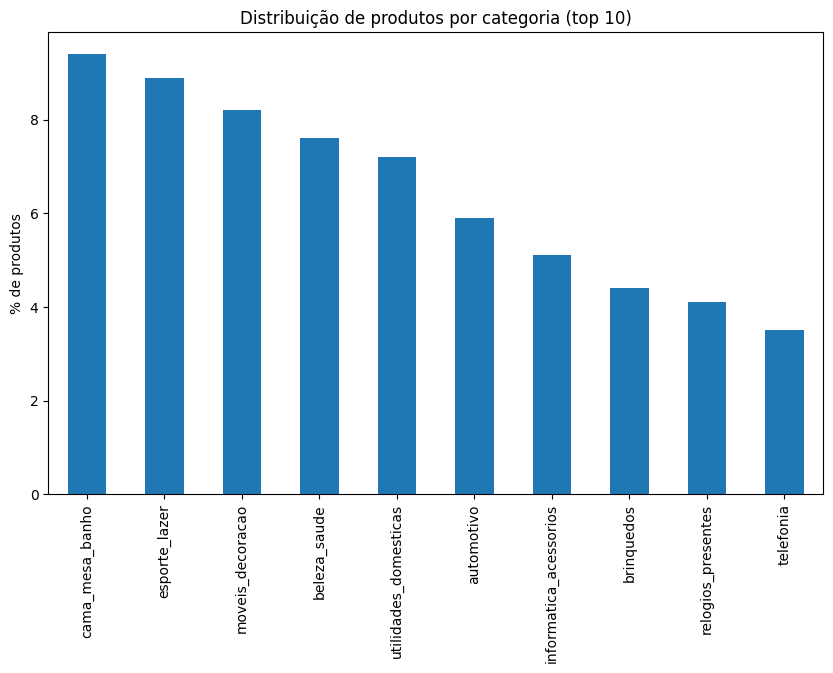

In [151]:
# Gráfico de barras dos produt por estado
product_category_top10 = product_category.head(10)

product_category_top10.plot(
    x='product_category_name',
    y='proportion',
    kind='bar',
    figsize=(10,6),
    xlabel='',
    ylabel='% de produtos',
    title='Distribuição de produtos por categoria (top 10)',
    legend=False
)

## Categorias dos produtos (de-para PT-EN)

In [36]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [37]:
product_category_name_translation.info()
print(product_category_name_translation.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
(71, 2)


In [94]:
# Tradução das categorias dos produtos é de 1:1, porém vimos que na tabela de características dos produtos há 73 categorias
print(f"# categorias em português: {product_category_name_translation['product_category_name'].nunique()}")
print(f"# categorias em inglês: {product_category_name_translation['product_category_name_english'].nunique()}")

# categorias em português: 71
# categorias em inglês: 71


In [126]:
# Quais categorias estão presentes na tabela de produtos mas não estão na de tradução?
set(products["product_category_name"]) - set(product_category_name_translation["product_category_name"])

{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [127]:
# Linhas com NaN na coluna 'product_category_name'
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


## Pedidos por produto

In [17]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [134]:
order_items.info()
print(order_items.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
(112650, 7)


In [137]:
print("Data mínima:", order_items["shipping_limit_date"].min())
print("Data máxima:", order_items["shipping_limit_date"].max())

Data mínima: 2016-09-19 00:15:34
Data máxima: 2020-04-09 22:35:08


In [ ]:
# Possui linhas duplicadas pois a quantidade de order_id é menor que o número de linhas da tabela
# Porém, sabe-se que um oder_id pode aparecer mais de uma vez, pois um pedido pode ter mais de um item
order_items['order_id'].nunique()

98666

In [189]:
order_items[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [152]:
# Quantos produtos são vendidos por mês e qual a receita bruta?
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items['year_month'] = order_items['shipping_limit_date'].dt.to_period('M')

produtos_vendidos_por_mes = (
    order_items
    .groupby('year_month')
    .agg(
        count_seller = ('seller_id', 'nunique'),
        count_unique_order = ('order_id', 'nunique'),
        count_unique_product = ('product_id', 'nunique'),
        gross_revenue = ('price', 'sum')
    )
    .reset_index()
    .sort_values(by='year_month')
)

produtos_vendidos_por_mes

,year_month,count_seller,count_unique_order,count_unique_product,gross_revenue
0,2016-09,2,2,2,194.47
1,2016-10,143,309,275,49580.55
2,2016-12,1,1,1,10.90
3,2017-01,178,573,454,80124.74
4,2017-02,412,1650,1196,245982.01
5,2017-03,474,2401,1641,343242.60
6,2017-04,479,2111,1491,308148.32
7,2017-05,589,3674,2362,505655.46
8,2017-06,551,3385,2189,469001.05
9,2017-07,595,3643,2319,465282.10


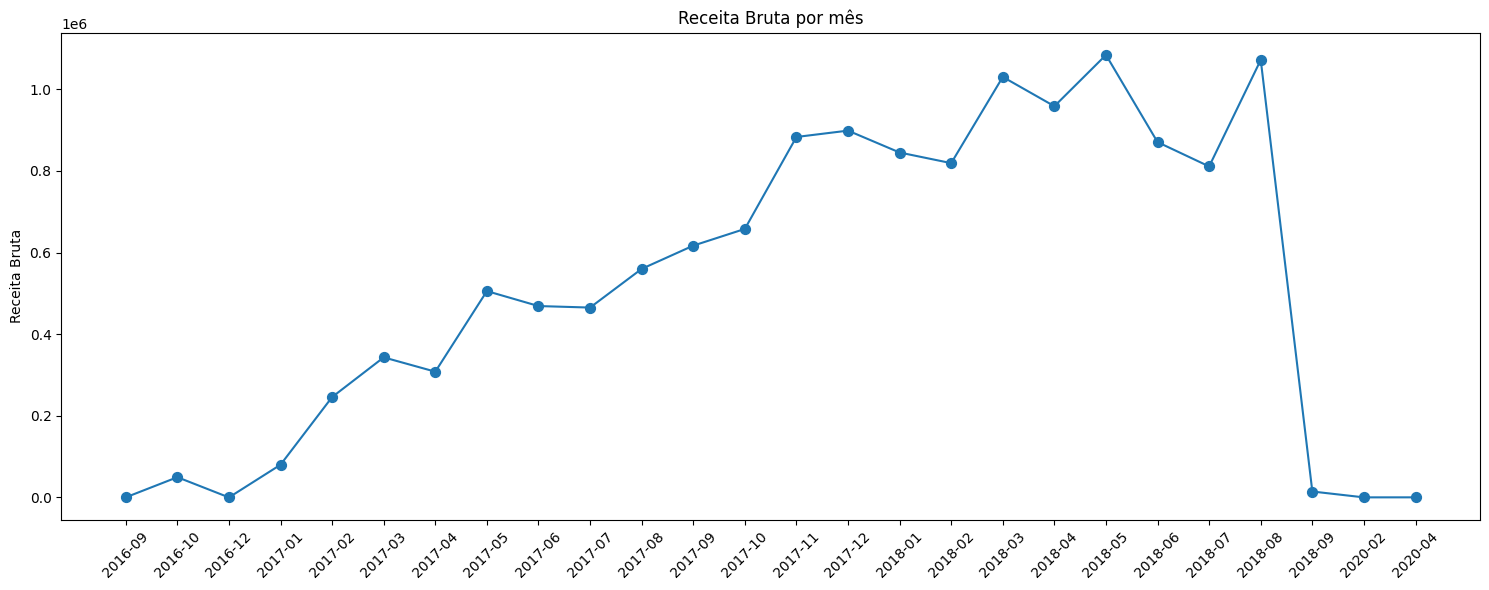

In [160]:
# Gráfico da receita bruta ao longo dos meses
y = produtos_vendidos_por_mes['gross_revenue'].values
x = produtos_vendidos_por_mes['year_month'].astype(str).values

plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.scatter(x, y, s=50)
plt.xlabel('')
plt.ylabel('Receita Bruta')
plt.title('Receita Bruta por mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

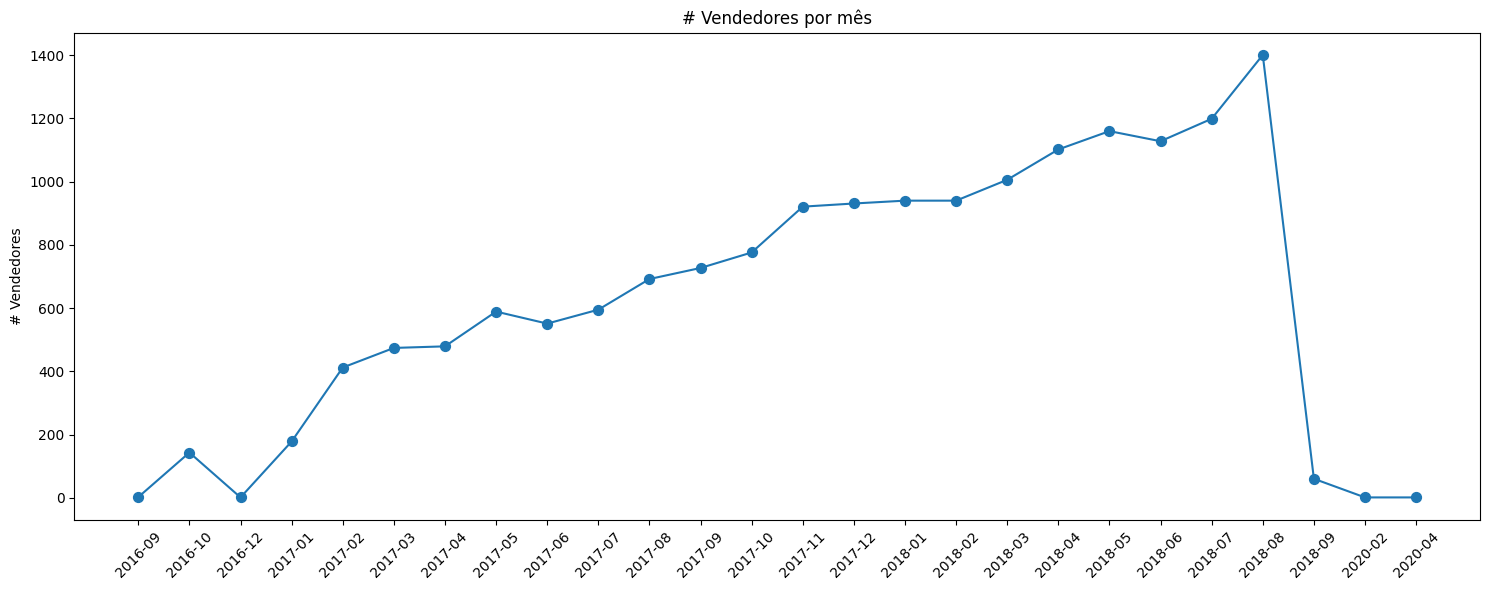

In [161]:
# Gráfico do número de vendedores ao longo dos meses
y = produtos_vendidos_por_mes['count_seller'].values
x = produtos_vendidos_por_mes['year_month'].astype(str).values

plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.scatter(x, y, s=50)
plt.xlabel('')
plt.ylabel('# Vendedores')
plt.title('# Vendedores por mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

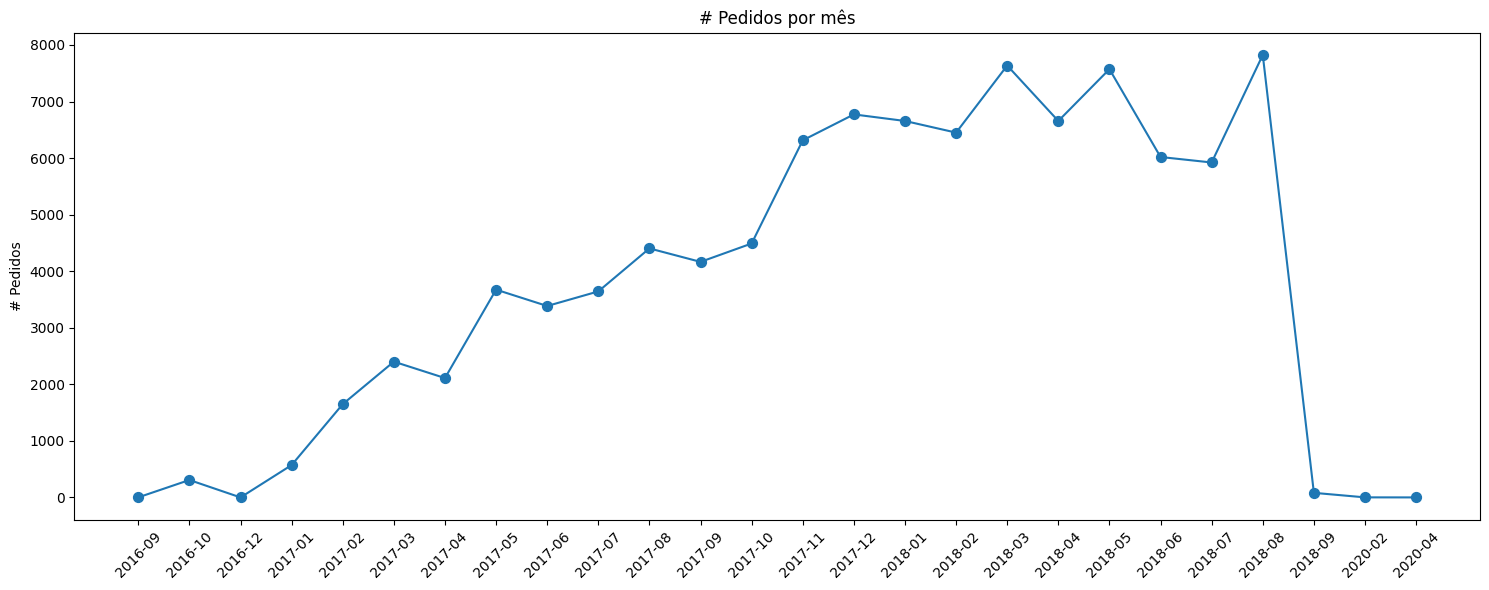

In [162]:
# Gráfico do número de pedidos ao longo dos meses
y = produtos_vendidos_por_mes['count_unique_order'].values
x = produtos_vendidos_por_mes['year_month'].astype(str).values

plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.scatter(x, y, s=50)
plt.xlabel('')
plt.ylabel('# Pedidos')
plt.title('# Pedidos por mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pagamentos dos pedidos

In [19]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
order_payments.info()
print(order_payments.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
(103886, 5)


In [163]:
# Percentual de produtos por categoria
order_payments_category = (
    order_payments
    .groupby(["payment_type"])
    .agg(total = ("payment_value", "sum"))
    .reset_index()
)
order_payments_category["proportion"] = round(order_payments_category["total"] / order_payments_category["total"].sum() * 100, 1)
order_payments_category = order_payments_category.sort_values(by="total", ascending=False)
order_payments_category

,payment_type,total,proportion
1,credit_card,12542084.19,78.3
0,boleto,2869361.27,17.9
4,voucher,379436.87,2.4
2,debit_card,217989.79,1.4
3,not_defined,0.00,0.0


<Axes: title={'center': 'Distribuição de pagamentos por categoria'}, ylabel='% pagamento'>

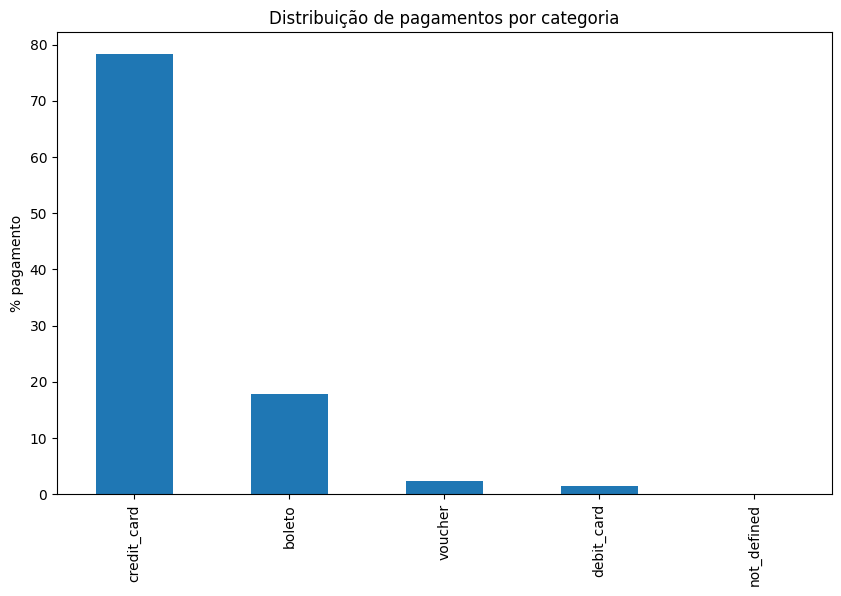

In [167]:
# Gráfico de barras do valor dos pagamentos por categoria
order_payments_category.plot(
    x='payment_type',
    y='proportion',
    kind='bar',
    figsize=(10,6),
    xlabel='',
    ylabel='% pagamento',
    title='Distribuição de pagamentos por categoria',
    legend=False
)

## Pedidos por status

In [38]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [39]:
orders.info()
print(orders.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
(99441, 8)


In [186]:
orders['order_id'].nunique()

99441

In [170]:
# Percentual de pedidos por status
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

order_status = (
    orders
    .groupby(["order_status"])
    .agg(count = ("order_id", "nunique"))
    .reset_index()
)
order_status["proportion"] = round(order_status["count"] / order_status["count"].sum() * 100, 1)
order_status = order_status.sort_values(by="count", ascending=False)
order_status

,order_status,count,proportion
3,delivered,96478,97.0
6,shipped,1107,1.1
1,canceled,625,0.6
7,unavailable,609,0.6
4,invoiced,314,0.3
5,processing,301,0.3
2,created,5,0.0
0,approved,2,0.0


<Axes: title={'center': 'Distribuição de pedidos por status'}, ylabel='% pedidos'>

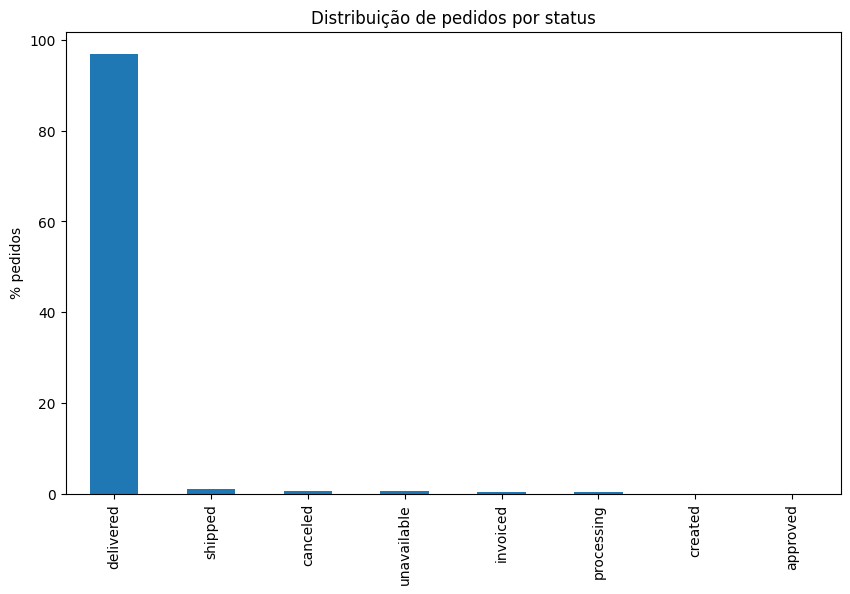

In [172]:
# Gráfico de barras do valor dos pagamentos por categoria
order_status.plot(
    x='order_status',
    y='proportion',
    kind='bar',
    figsize=(10,6),
    xlabel='',
    ylabel='% pedidos',
    title='Distribuição de pedidos por status',
    legend=False
)

## Reviews dos pedidos

In [22]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
order_reviews.info()
print(order_reviews.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
(99224, 7)


In [178]:
# Top produtos com maior score médio
review = (
    order_reviews
    .groupby(["order_id"])
    .agg(
        count = ("review_score", "count"),
        mean = ("review_score", "mean"),
        median = ("review_score", "median"),
        std = ("review_score", "std"),
    )
    .reset_index()
)
review["proportion"] = round(review["count"] / review["count"].sum() * 100, 1)
review["mean"] = round(review["mean"], 1)
review["std"] = round(review["std"], 1)
review = review.sort_values(by="count", ascending=False)
review

,order_id,count,mean,median,std,proportion
54489,8e17072ec97ce29f0e1f111e598b0c85,3,1.0,1.0,0.0,0.0
77319,c88b1d1b157a9999ce368f218a407141,3,4.3,5.0,1.2,0.0
1455,03c939fd7fd3b38f8485a0f95798f1f6,3,3.3,3.0,0.6,0.0
86232,df56136b8031ecd28e200bb18e6ddb2e,3,5.0,5.0,0.0,0.0
15722,29062384ce4975f78aeba6a496510386,2,3.0,3.0,2.8,0.0
...,...,...,...,...,...,...
32987,559609410c90dc1792181a5f260a6600,1,4.0,4.0,NaN,0.0
32986,5595480d373b37e5738fc085dd9bcb8e,1,4.0,4.0,NaN,0.0
32985,559115c14f48d999adcc027b4a702c8b,1,5.0,5.0,NaN,0.0
32984,5590b14b260d2f61b2db5efb8d4a4601,1,5.0,5.0,NaN,0.0


In [181]:
# Quais as categorias com score mais alto?
df = (
    order_items
    .merge(products, on="product_id", how="left")
    .merge(order_reviews, on="order_id", how="left")
)

# Top categorias com maior score médio
review = (
    df
    .groupby(["product_category_name"])
    .agg(
        count = ("order_id", "nunique"),
        mean = ("review_score", "mean"),
        median = ("review_score", "median"),
        std = ("review_score", "std"),
    )
    .reset_index()
)
review["proportion"] = round(review["count"] / review["count"].sum() * 100, 1)
review["mean"] = round(review["mean"], 1)
review["std"] = round(review["std"], 1)

In [182]:
review = review.sort_values(by="count", ascending=False)
review

,product_category_name,count,mean,median,std,proportion
13,cama_mesa_banho,9417,3.9,5.0,1.4,9.6
11,beleza_saude,8836,4.1,5.0,1.3,9.0
32,esporte_lazer,7720,4.1,5.0,1.4,7.9
44,informatica_acessorios,6689,3.9,5.0,1.5,6.8
54,moveis_decoracao,6449,3.9,5.0,1.5,6.6
...,...,...,...,...,...,...
46,la_cuisine,13,4.0,5.0,1.7,0.0
17,cds_dvds_musicais,12,4.6,5.0,0.6,0.0
60,pc_gamer,8,3.3,4.0,1.8,0.0
37,fashion_roupa_infanto_juvenil,8,4.5,5.0,1.4,0.0


In [183]:
review = review.sort_values(by="mean", ascending=False)
review

,product_category_name,count,mean,median,std,proportion
17,cds_dvds_musicais,12,4.6,5.0,0.6,0.0
37,fashion_roupa_infanto_juvenil,8,4.5,5.0,1.4,0.0
22,construcao_ferramentas_ferramentas,97,4.4,5.0,1.1,0.1
49,livros_tecnicos,260,4.4,5.0,1.2,0.3
47,livros_importados,53,4.4,5.0,1.3,0.1
...,...,...,...,...,...,...
55,moveis_escritorio,1273,3.5,4.0,1.5,1.3
65,portateis_cozinha_e_preparadores_de_alimentos,14,3.3,3.0,1.6,0.0
60,pc_gamer,8,3.3,4.0,1.8,0.0
42,fraldas_higiene,27,3.3,3.0,1.6,0.0


In [184]:
correlation = review["count"].corr(review["mean"])
print("Correlação entre count e mean:", correlation)

Correlação entre count e mean: 0.03301575040501834


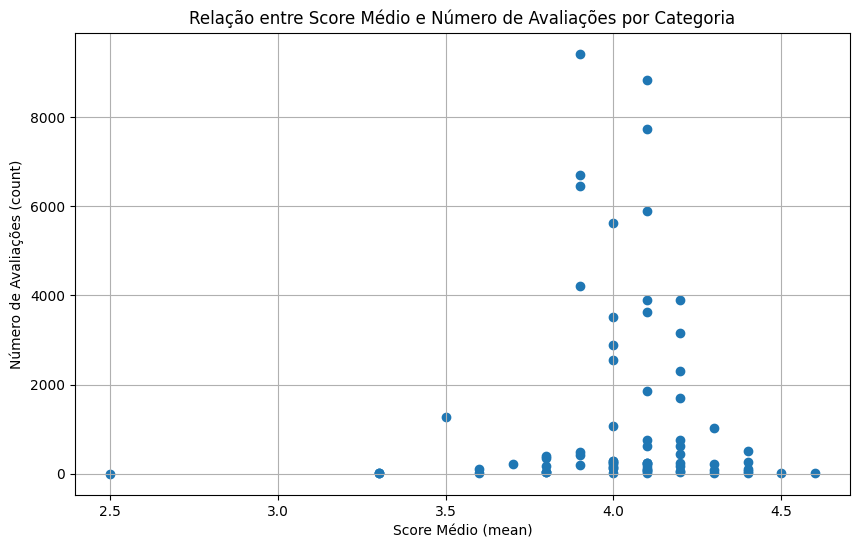

In [185]:
plt.figure(figsize=(10,6))
plt.scatter(review["mean"], review["count"])

plt.title("Relação entre Score Médio e Número de Avaliações por Categoria")
plt.xlabel("Score Médio (mean)")
plt.ylabel("Número de Avaliações (count)")
plt.grid(True)
plt.show()

# Conclusões

* A receita bruta, a quantidade de vendedores e de pedidos aumenta a partir de jan/2017 e diminui drasticamente a partir de set/2018. Portanto, seria seguro usar os dados de jan/2017 até ago/2018.

* Tomar cuidado com os valores nulos das categorias dos ids de produtos na tabela `produtcs`.

* Todos os pedidos têm data de compra, porém podem estar sem data de aprovação, postagem, entrega ao consumidor ou entrega estimada. Mas todos possuem status do pedido.

* Quase 100% dos pedidos possuem nota de review. Porém, nem todos possuem comentário.

* Não há correlação forte entre o número de reviews e o score médio das avaliações.

* Há oportunidades de serem construídos diversos modelos de machine learning com esses datasets. Identificamos alguns focados em:

    - Segmentação de clientes (clustering);
    - Churn de clientes (classificação);
    - Previsão de preço de produto (regressão);
    - Previsão de demanda por vendedor (série temporal);
    - Análise de sentimento das avaliações (NLP)